S1100: primary road <br>
S1200: secondary road <br>
S1400: a local neighborhood road, rural road, or city street <br>
Datum: Global Coordinate System North American Datum of 1983 (GCS NAD83) <br>
Different database road length comparison and exploratory analysis <br>

In [2]:
import geopandas as gpd
import matplotlib.axes
from shapely.geometry import LineString
import requests
import io
import zipfile
import os
from bs4 import BeautifulSoup
import pandas as pd
from dbfread import DBF

### This notebook is about Different database road length comparison and exploratory analysis

### Tiger Data County Exploration

### 42023	Cameron

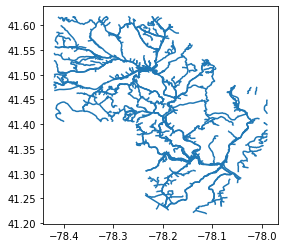

In [3]:
cameron_shp=gpd.read_file('tl_2017_42023_roads/tl_2017_42023_roads.shp')
cameron_shp.plot()

In [4]:
new_geo=cameron_shp['geometry'].to_crs(epsg=32129)
new_geo
print(sum(new_geo.length)/1609)
#with units of miles
#793 in penn dot

869.2464457167077


### 42053 Forest

1499.3509061691627


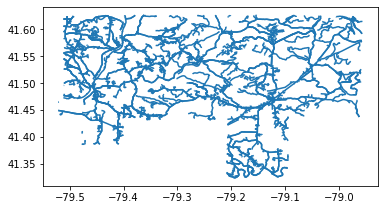

In [5]:
forest_shp=gpd.read_file('tl_2017_42053_roads/tl_2017_42053_roads.shp')
forest_shp.plot()
new_geo=forest_shp['geometry'].to_crs(epsg=32129)
new_geo
print(sum(new_geo.length)/1609)
#with units of miles
#488 miles in penn dot

### 42105 Potter

3238.9986338609497


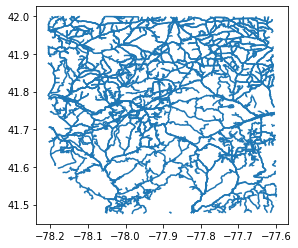

In [6]:
potter_shp=gpd.read_file('tl_2017_42105_roads/tl_2017_42105_roads.shp')
potter_shp.plot()
new_geo=potter_shp['geometry'].to_crs(epsg=32129)
new_geo
print(sum(new_geo.length)/1609)
#with units of miles
#1091 miles in penn dot

### Allegheny County Exploration

        LINEARID                        FULLNAME RTTYP  MTFCC  \
0   110428614549  Millerstown Culmerville Rd Rmp     M  S1400   
1  1103580799095             Camp Meeting Rd Exd     M  S1400   
2  1104257690040                    Maple St Exd     M  S1400   
3   110428547097                     Bank St Exd     M  S1400   
4   110428550116                    Alice St Exd     M  S1400   

                                            geometry  
0  LINESTRING (-79.83719 40.65073, -79.83682 40.6...  
1  LINESTRING (-80.16679 40.59469, -80.16678 40.5...  
2  LINESTRING (-80.16084 40.51258, -80.16078 40.5...  
3  LINESTRING (-80.11269 40.35748, -80.11254 40.3...  
4  LINESTRING (-80.08848 40.41140, -80.08863 40.4...  


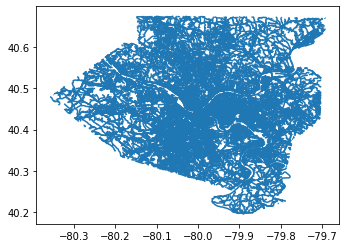

In [7]:
shapefile = gpd.read_file('tl_2017_42003_roads/tl_2017_42003_roads.shp')
print(shapefile[0:5])
shapefile.plot()

In [8]:
interstate=shapefile[shapefile['MTFCC']=='S1100']
interstate

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
252,1104703826449,I- 376 Bus,I,S1100,"LINESTRING (-80.27253 40.52796, -80.27277 40.5..."
347,1104258803555,Parkway W,M,S1100,"LINESTRING (-80.19464 40.46429, -80.19378 40.4..."
356,1104258802961,Parkway W,M,S1100,"LINESTRING (-80.17362 40.45218, -80.17630 40.4..."
368,1104258584540,I- 79,I,S1100,"LINESTRING (-80.14570 40.32120, -80.14527 40.3..."
1187,1102304342817,Airport Expy,M,S1100,"LINESTRING (-80.22014 40.47207, -80.21859 40.4..."
...,...,...,...,...,...
35501,1104703229017,William Penn Hwy,M,S1100,"LINESTRING (-79.75228 40.43881, -79.75168 40.4..."
35782,1104258802713,Steubenville Pike,M,S1100,"LINESTRING (-80.16618 40.44733, -80.16663 40.4..."
36443,1102678351374,Squirrel Hill Tunl,M,S1100,"LINESTRING (-79.92648 40.42798, -79.92569 40.4..."
36631,1103017797062,Crosstown Blvd,M,S1100,"LINESTRING (-79.99390 40.43893, -79.99376 40.4..."


In [10]:
print(sum(interstate['geometry'].to_crs(epsg=32129).length)/1609)
inter=shapefile[shapefile['RTTYP']=='I']
print(sum(inter['geometry'].to_crs(epsg=32129).length)/1609)

496.1332759827056
234.57544636779122


#### projection try

In [11]:
new_geometry = shapefile['geometry'].to_crs(epsg=32129)
print(new_geometry.iloc[0].length)
# with units of meters
sum(new_geometry.length)
print(14940253.3938518/1609)

198.18072162717056
9285.42783955985


In [12]:
projection_length=new_geometry.length
new_df=pd.concat([shapefile, projection_length],axis=1)
new_df.rename(columns={0:'projction_length'},inplace=True)
new_df

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry,projction_length
0,110428614549,Millerstown Culmerville Rd Rmp,M,S1400,"LINESTRING (-79.83719 40.65073, -79.83682 40.6...",198.180722
1,1103580799095,Camp Meeting Rd Exd,M,S1400,"LINESTRING (-80.16679 40.59469, -80.16678 40.5...",271.441024
2,1104257690040,Maple St Exd,M,S1400,"LINESTRING (-80.16084 40.51258, -80.16078 40.5...",2048.196533
3,110428547097,Bank St Exd,M,S1400,"LINESTRING (-80.11269 40.35748, -80.11254 40.3...",86.180325
4,110428550116,Alice St Exd,M,S1400,"LINESTRING (-80.08848 40.41140, -80.08863 40.4...",161.000276
...,...,...,...,...,...,...
39332,110428571392,Old W Hardies Rd,M,S1400,"LINESTRING (-79.95222 40.61372, -79.95233 40.6...",230.252562
39333,110428556300,Old N Branch Rd,M,S1400,"LINESTRING (-80.21079 40.42020, -80.21066 40.4...",611.478271
39334,110428556990,Old N Church Rd,M,S1400,"LINESTRING (-79.71230 40.66655, -79.71243 40.6...",42.093126
39335,110428556749,Bus Center Dr,M,S1400,"LINESTRING (-80.13958 40.43297, -80.13948 40.4...",343.428737


In [13]:
len1=sum(new_df.loc[new_df['MTFCC'] == 'S1100']['projction_length'])/1690 # Sum the length of primary roads
len2=sum(new_df.loc[new_df['MTFCC'] == 'S1200']['projction_length'])/1690 # Sum the length of secondary roads
len3=sum(new_df.loc[new_df['MTFCC'] == 'S1400']['projction_length'])/1690 # Sum the length of tertiary/local roads
#with units of miles
print(len1,len2,len3)
sum_length=len1+len2+len3
print(sum_length)

472.3541071338303 942.7436903555109 6989.645046575266
8404.742844064607


### NHTSA Data Exploration

In [17]:
nhs_shapefile=gpd.read_file('NHS_03272020/NHS20200327.shp')

In [4]:
nhs_shapefile.columns

Index(['ID', 'DIR', 'LENGTH', 'VERSION', 'YEAR', 'STFIPS', 'CTFIPS', 'ROUTEID',
       'BEGINPOINT', 'ENDPOINT', 'SIGN1', 'SIGNT1', 'SIGNN1', 'SIGNQ1',
       'LNAME', 'NHS', 'STATUS', 'FACID', 'CONNID', 'CONNDES', 'CONNMILES',
       'ACLASS', 'FCLASS', 'FACILITYT', 'OWNERSHIP', 'URBANCODE', 'AADT',
       'AADT_COM', 'AADT_SINGL', 'FUT_AADT', 'FUT_YEAR', 'THROUGH_LA', 'MILES',
       'UPDATE_DAT', 'NHS_ACTION', 'UPDATECODE', 'geometry'],
      dtype='object')

In [15]:
state_length=[]
for i in range(57):
    state_length.append(sum(nhs_shapefile[nhs_shapefile.STFIPS == i].geometry.length))
print(state_length)
print(sum(state_length))
print(sum(nhs_shapefile[nhs_shapefile.ID==574541].geometry.length))

[0.00023708437317356706, 71.04480817434927, 49.11418755993076, 0.0014324395750970214, 51.81642472580812, 57.71135008848652, 229.15178388169875, 0, 81.82526476254387, 24.742688382386063, 6.964214787241501, 2.342175649880607, 136.93217594845893, 116.86845708065873, 0.03892456721562595, 6.888675403113735, 47.4767298288313, 129.79180971400856, 63.11483060293881, 87.96146825088843, 74.04489233935318, 54.57041206774243, 53.159563227762355, 22.87864141526885, 36.18785027784354, 57.12783783341027, 112.17060648501813, 93.26366162638995, 61.97603154578364, 97.31177911962925, 76.1999117843911, 63.0295735873005, 42.22490198243603, 16.099766818919846, 49.88667594811584, 50.31961778061102, 138.77514838533176, 95.66651475821725, 68.16989158588672, 97.36640641546953, 58.32590130707526, 75.2573799344413, 121.7831561230516, 0, 10.09178667374165, 58.12736283720916, 65.98069284098354, 82.05103222809831, 287.3518895536778, 47.12587573467469, 12.001749641395007, 77.47072131049349, 0.028806699225706764, 82.2

In [22]:
print(sum(nhs_shapefile.geometry.length))
print((sum(nhs_shapefile[nhs_shapefile.STFIPS == 42].geometry.length)))
print((sum(nhs_shapefile[nhs_shapefile.STFIPS == 37].geometry.length)))

3703.5503471188977
121.7831561230516
95.66651475821725


In [18]:
state_length_df=pd.DataFrame(columns=['Total'],data=state_length)
state_length_df.to_csv('State.csv')

In [14]:
nhs_shapefile.to_csv('Road_comb_county.csv')

In [9]:
mpo=gpd.read_file('MPOBoundary_05142020/MPOBoundary.shp')
print(mpo[0:5])

   ID         AREA  DATA    MPO_ID  \
0   2   612.546387   2.0  15197500   
1   1   730.107300   1.0  15201300   
2   3   245.808426   3.0  02196800   
3   4   112.323090   4.0  02200300   
4  27  3396.555900  28.0  72200200   

                                            MPO_NAME STATE  \
0                                           Oahu MPO    HI   
1                                           Maui MPO    HI   
2  Anchorage Metropolitan Area Transportation Sol...    AK   
3  Fairbanks Metropolitan Area Transportation System    AK   
4     Puerto Rico Metropolitan Planning Organization    PR   

                                            geometry  
0  MULTIPOLYGON (((-5917991.095 -158464.819, -591...  
1  POLYGON ((-5857352.123 -247461.348, -5857342.6...  
2  POLYGON ((-2755658.644 3285183.649, -2755491.8...  
3  POLYGON ((-2473823.221 3555180.880, -2473862.3...  
4  MULTIPOLYGON (((2962778.721 -2065085.552, 2962...  


In [ ]:
dbf_file=DBF('NHS_03272020/NHS20200327.dbf')
for record in dbf_file:
    print(record)

### Penn Dot data Exploration

In [2]:
penn_shapefile = gpd.read_file('RMSADMIN__Administrative_Classifications_of_Roadway_-shp/RMSADMIN__Administrative_Classifications_of_Roadway_.shp')
#print(penn_shapefile[0:5])

In [3]:
penn_shapefile

,OBJECTID,ST_RT_NO,CTY_CODE,DISTRICT_N,JURIS,SEG_BGN,OFFSET_BGN,SEG_END,OFFSET_END,SEG_LNGTH_,...,RECORD_UPD,FIPS_AREA_,FHWA_FUNC_,GIS_UPDATE,GIS_GEOMET,SE_ANNO_CA,GPID,GEOMETRYLE,GEOMETRY,geometry
0,1,2041,62,12,1,0130,0,0180,0,12933.0,...,20161019,00000,5,1970-01-01,2019-07-21,None,1,0,None,"LINESTRING (-8908315.690 4873541.141, -8908308..."
1,2,2079,62,12,1,0070,0,0110,2514,11467.0,...,20161019,00000,7,1970-01-01,2019-07-21,None,2,0,None,"LINESTRING (-8897218.612 4874527.984, -8897273..."
2,3,2079,62,12,1,0140,0,0160,0,4437.0,...,20161019,00000,7,1970-01-01,2019-07-21,None,3,0,None,"LINESTRING (-8899032.548 4879634.394, -8899075..."
3,4,2083,62,12,1,0010,0,0010,1979,1979.0,...,20200119,58168,7,2020-01-19,2019-07-21,None,4,0,None,"LINESTRING (-8894623.998 4874557.893, -8894603..."
4,5,2022,57,04,1,0120,0,0120,550,550.0,...,20161019,00000,7,1970-01-01,2019-07-21,None,5,0,None,"LINESTRING (-8423885.245 5116624.219, -8423807..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53573,343718,0087,41,03,1,0004,0,0020,0,1802.0,...,20200607,95455,4,2020-06-07,2020-06-07,None,343718,0,None,"LINESTRING (-8562040.493 5051314.805, -8562036..."
53574,343750,1023,54,03,1,0004,0,0010,0,326.0,...,20200607,85762,0,2020-06-07,2020-06-07,None,343750,0,None,"LINESTRING (-8554892.993 4986014.305, -8554882..."
53575,343756,8003,58,03,1,0502,0,0502,3407,3407.0,...,20200607,00000,2,2020-06-07,2020-06-07,None,343756,0,None,"LINESTRING (-8581122.187 5134424.276, -8581143..."
53576,343757,8003,58,03,1,0512,0,0512,2263,2263.0,...,20200607,00000,2,2020-06-07,2020-06-07,None,343757,0,None,"LINESTRING (-8581704.737 5135974.424, -8581608..."


In [21]:
#print(penn_shapefile['SEG_LNGTH_FEET'].sum())
#penn_shapefile['SEG_LNGTH_FEET']=penn_shapefile.apply(lambda x: x.sum(), axis=1)
#sum=penn_shapefile['SEG_LNGTH_FEET'].sum()
#print(sum)

#new_geometry = penn_shapefile['geometry'].to_crs(epsg=32129)
#print(new_geometry.iloc[0].length)
#print(sum(new_geometry.length))
new = penn_shapefile['SEG_LNGTH_']
print(penn_shapefile.columns.tolist())
#print(new)
print(sum(new)/5280)
# 120,521 miles in highway statistics
# total length is 49,238 miles after projection in Arcgis

['OBJECTID', 'ST_RT_NO', 'CTY_CODE', 'DISTRICT_N', 'JURIS', 'SEG_BGN', 'OFFSET_BGN', 'SEG_END', 'OFFSET_END', 'SEG_LNGTH_', 'SEG_PT_BGN', 'SEG_PT_END', 'SEQ_NO', 'MAINT_FUNC', 'POST_BOND_', 'SPEED_LIMI', 'FED_AID_SY', 'FED_AID_UR', 'FUNC_CLS', 'FED_ID', 'FED_AID__1', 'MSLINK', 'MAPID', 'NLF_ID', 'SIDE_IND', 'NLF_CNTL_B', 'NLF_CNTL_E', 'CUM_OFFSET', 'CUM_OFFS_1', 'RECORD_UPD', 'FIPS_AREA_', 'FHWA_FUNC_', 'GIS_UPDATE', 'GIS_GEOMET', 'SE_ANNO_CA', 'GPID', 'GEOMETRYLE', 'GEOMETRY', 'geometry']
50818.180625000015


### Penn Share State Roads Data Exploration

In [2]:
shapefile_local = gpd.read_file('PennsylvaniaLocalRoads-shp/PennsylvaniaLocalRoads.shp')

In [6]:
shapefile_local.head(5)

,OBJECTID_1,LRS_ID,CTY_CODE,LR_RT_NO,DISTRICT_N,MUN_ID,MUNICIPAL_,MUNICIPA_1,LR_NAME,LR_TYPE,...,NOTE,ELEMENTLEV,ELEMENTSTY,SHAPE_LENG,GIS_UPDATE,OBJECTID,GPID,GEOMETRY_L,Shape__Len,geometry
0,1,10348814,26,None,12,NaN,26224,None,None,None,...,NPS-FORT NECESSITY NATIONAL BATTELFIELD,18.0,0.0,824.94,2019-06-11,10348814,10348814,0,235.668472,"LINESTRING (-79.58436 39.81487, -79.58441 39.8..."
1,2,10348815,26,None,12,NaN,26224,None,None,None,...,NPS-FORT NECESSITY NATIONAL BATTELFIELD,18.0,0.0,5448.06,None,10348815,10348815,0,1660.567896,"LINESTRING (-79.59548 39.81020, -79.59550 39.8..."
2,3,10348816,26,None,12,NaN,26220,None,None,None,...,NPS-FRIENDSHIP HILL HISTORIC SITE,18.0,0.0,722.72,None,10348816,10348816,0,220.284051,"LINESTRING (-79.92999 39.77733, -79.93021 39.7..."
3,4,10348817,26,None,12,NaN,26220,None,None,None,...,NPS-FRIENDSHIP HILL HISTORIC SITE,18.0,0.0,792.63,None,10348817,10348817,0,241.592259,"LINESTRING (-79.92999 39.77733, -79.93015 39.7..."
4,5,10348818,45,None,05,NaN,45213,None,None,None,...,NPS-DELAWARE WATER GAP NATIONAL RECREATION AREA,18.0,0.0,4359.56,2019-07-16,10348818,10348818,0,1328.680725,"LINESTRING (-75.11276 41.00967, -75.11221 41.0..."


In [18]:
shapefile_local['Shape__Len'].sum()

170123323.60060933

In [11]:
non_nan_geometry = shapefile_local['geometry'][~shapefile_local['geometry'].isna()]

In [17]:
sum(non_nan_geometry.to_crs(epsg=32129).length)

170103474.90774685

In [ ]:
shapefile_local['geometry'].isna

In [29]:
new=shapefile_local['geometry'].to_crs(epsg=32129)
#print(sum(new.length)/1609)

In [7]:
Allegheny=shapefile_penn_state[shapefile_penn_state['CTY_CODE'] == '02']

In [8]:
Allegheny

,OBJECTID,ST_RT_NO,CTY_CODE,DISTRICT_N,JURIS,SEG_NO,SEG_LNGTH_,SEQ_NO,SUB_ROUTE,YR_BUILT,...,SURFACE_YE,SEGMENT_MI,LANE_MILES,GIS_UPDATE,GIS_GEOMET,SE_ANNO_CA,GPID,GEOMETRYLE,GEOMETRY,geometry
513,2244,0136,02,11,1,0020,713.0,4000,0,1900,...,2017,0.1350,0.2701,2020-05-03,2019-07-21,None,2244,0,None,"LINESTRING (-8895970.676 4895225.259, -8895966..."
514,2245,0136,02,11,1,0030,3481.0,4100,0,1900,...,2017,0.6593,1.3186,2020-05-03,2019-07-21,None,2245,0,None,"LINESTRING (-8895714.583 4895102.356, -8895695..."
515,2246,0136,02,11,1,0040,3242.0,4200,0,1900,...,2017,0.6140,1.2280,2020-05-03,2019-07-21,None,2246,0,None,"LINESTRING (-8894405.794 4894717.226, -8894347..."
516,2247,0136,02,11,1,0050,3453.0,4300,0,1900,...,2017,0.6540,1.3080,2020-05-03,2019-07-21,None,2247,0,None,"LINESTRING (-8893117.222 4894726.983, -8893098..."
517,2248,0136,02,11,1,0060,1841.0,4400,0,1931,...,2017,0.3487,0.6973,2020-05-03,2019-07-21,None,2248,0,None,"LINESTRING (-8891752.680 4894857.567, -8891747..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120657,3421948,8073,02,11,1,0522,84.0,20000800,750,1990,...,2013,0.0159,0.0159,2020-06-21,2020-06-21,None,3421948,0,None,"LINESTRING (-8893276.363 4906143.973, -8893279..."
120658,3421949,8073,02,11,1,0532,84.0,20000900,760,1985,...,1985,0.0159,0.0159,2020-06-21,2020-06-21,None,3421949,0,None,"LINESTRING (-8893420.088 4906168.639, -8893502..."
120659,3421950,8073,02,11,1,0542,180.0,20001000,770,1990,...,2013,0.0341,0.0341,2020-06-21,2020-06-21,None,3421950,0,None,"LINESTRING (-8893632.009 4906069.407, -8893664..."
120660,3421958,8078,02,11,1,0512,480.0,20000700,500,1985,...,1985,0.0909,0.0909,2020-06-21,2020-06-21,None,3421958,0,None,"LINESTRING (-8904622.777 4931271.593, -8904597..."


In [9]:
sum(Allegheny['SEGMENT_MI'])
#9285 miels from TIGER for Allegheny

2248.557199999998

In [25]:
print(shapefile_penn_state.columns.tolist())

['OBJECTID', 'ST_RT_NO', 'CTY_CODE', 'DISTRICT_N', 'JURIS', 'SEG_NO', 'SEG_LNGTH_', 'SEQ_NO', 'SUB_ROUTE', 'YR_BUILT', 'YR_RESURF', 'DIR_IND', 'FAC_TYPE', 'TOTAL_WIDT', 'SURF_TYPE', 'LANE_CNT', 'PARK_LANE', 'DIVSR_TYPE', 'DIVSR_WIDT', 'COND_DATE', 'ROUGH_INDX', 'PVMNT_COND', 'CUR_AADT', 'ACCESS_CTR', 'TOLL_CODE', 'STREET_NAM', 'TRAF_RT_NO', 'TRAF_RT__1', 'TRAF_RT__2', 'BGN_DESC', 'END_DESC', 'MAINT_RESP', 'URBAN_RURA', 'NHS_IND', 'TANDEM_TRL', 'ACCESS_TAN', 'INTERST_NE', 'NHPN_IND', 'NORM_ADMIN', 'NORM_TRAFF', 'NORM_SHLD_', 'MAPID', 'NLF_ID', 'SIDE_IND', 'NLF_CNTL_B', 'NLF_CNTL_E', 'CUM_OFFSET', 'CUM_OFFS_1', 'X_VALUE_BG', 'Y_VALUE_BG', 'X_VALUE_EN', 'Y_VALUE_EN', 'GRAPHIC_LE', 'KEY_UPDATE', 'ATTR_UPDAT', 'OVERALL_PV', 'SEG_STATUS', 'PAVMT_CYCL', 'DRAIN_CYCL', 'GDRAIL_CYC', 'DISTRICT_S', 'TRT_TYPE_N', 'PA_BYWAY_I', 'STREET_N_1', 'TRAF_RT__3', 'TRAF_RT__4', 'TRAF_RT__5', 'STREET_N_2', 'TRAF_RT__6', 'TRAF_RT__7', 'TRAF_RT__8', 'TRXN_FLAG', 'ROUTE_DIR', 'BUS_PLAN_N', 'EXP_WAY_NE', 'HPMS_S

In [26]:
sum(shapefile_penn_state['SEGMENT_MI'])

50832.20459999796

### Tiger Data Exploration

        LINEARID           FULLNAME RTTYP  MTFCC  \
0  1103672784948       McGee Rd Exn     M  S1400   
1  1103677525952       Buena Vis Lp     M  S1400   
2   110585079164         Co Rd 21 N     C  S1400   
3   110585079123         Co Rd 19 N     C  S1400   
4  1102603649960  Forest Ridge Rd N     M  S1400   

                                            geometry  
0  LINESTRING (-86.68571 32.60424, -86.68572 32.6...  
1  LINESTRING (-86.44949 32.42550, -86.44939 32.4...  
2  LINESTRING (-86.63291 32.43712, -86.63347 32.4...  
3  LINESTRING (-86.65293 32.43341, -86.65306 32.4...  
4  LINESTRING (-86.58537 32.49744, -86.58527 32.4...  
Co Rd 135        12
Molly Cove Ln     9
State Rte 6       9
Co Rd 21 N        9
US Hwy 82         9
                 ..
Rhodes Ln         1
Warren Cir        1
Chatam Ln         1
Smedley St        1
Keenland Cmn      1
Name: FULLNAME, Length: 1600, dtype: int64


AttributeError: 'GeoDataFrame' object has no attribute 'to'

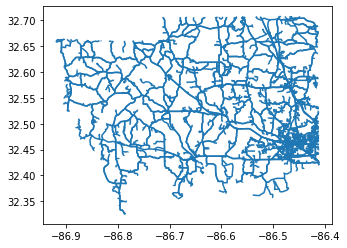

In [18]:
shapefile = gpd.read_file('tl_2017_01001_roads/tl_2017_01001_roads.shp')
print(shapefile[0:5])
shapefile.plot()
print(shapefile.FULLNAME.value_counts())
shapefile.to

In [14]:
penn_shoulder['geometry']

0         LINESTRING (-8605724.500 4825344.263, -8605652...
1         LINESTRING (-8605724.500 4825344.263, -8605652...
2         LINESTRING (-8605760.707 4825344.443, -8605718...
3         LINESTRING (-8605760.707 4825344.443, -8605718...
4         LINESTRING (-8602088.998 4829265.643, -8601953...
                                ...                        
123910    LINESTRING (-8443054.510 4961561.997, -8443046...
123911    LINESTRING (-8562252.506 5050865.847, -8562251...
123912    LINESTRING (-8392957.951 4887306.343, -8392769...
123913    LINESTRING (-8392957.951 4887306.343, -8392769...
123914    LINESTRING (-8392122.083 4888363.397, -8391974...
Name: geometry, Length: 123915, dtype: geometry

In [3]:
dbf_file=DBF('tl_2017_01001_roads/tl_2017_01001_roads.dbf')
for record in dbf_file:
    print(record)

OrderedDict([('LINEARID', '1103672784948'), ('FULLNAME', 'McGee Rd Exn'), ('RTTYP', 'M'), ('MTFCC', 'S1400')])
OrderedDict([('LINEARID', '1103677525952'), ('FULLNAME', 'Buena Vis Lp'), ('RTTYP', 'M'), ('MTFCC', 'S1400')])
OrderedDict([('LINEARID', '110585079164'), ('FULLNAME', 'Co Rd 21 N'), ('RTTYP', 'C'), ('MTFCC', 'S1400')])
OrderedDict([('LINEARID', '110585079123'), ('FULLNAME', 'Co Rd 19 N'), ('RTTYP', 'C'), ('MTFCC', 'S1400')])
OrderedDict([('LINEARID', '1102603649960'), ('FULLNAME', 'Forest Ridge Rd N'), ('RTTYP', 'M'), ('MTFCC', 'S1400')])
OrderedDict([('LINEARID', '1103944553722'), ('FULLNAME', 'Valridge N'), ('RTTYP', 'M'), ('MTFCC', 'S1400')])
OrderedDict([('LINEARID', '110585079163'), ('FULLNAME', 'Co Rd 21 N'), ('RTTYP', 'C'), ('MTFCC', 'S1400')])
OrderedDict([('LINEARID', '110585079158'), ('FULLNAME', 'Co Rd 21 N'), ('RTTYP', 'C'), ('MTFCC', 'S1400')])
OrderedDict([('LINEARID', '1103944553723'), ('FULLNAME', 'Valridge N'), ('RTTYP', 'M'), ('MTFCC', 'S1400')])
OrderedDict(

OrderedDict([('LINEARID', '110585083796'), ('FULLNAME', 'N Ridge Rd'), ('RTTYP', 'M'), ('MTFCC', 'S1400')])
OrderedDict([('LINEARID', '110585091941'), ('FULLNAME', 'N Memorial Dr'), ('RTTYP', 'M'), ('MTFCC', 'S1200')])
OrderedDict([('LINEARID', '110585091410'), ('FULLNAME', 'N Autauga St'), ('RTTYP', 'M'), ('MTFCC', 'S1400')])
OrderedDict([('LINEARID', '1103278069558'), ('FULLNAME', 'N Chesnut St'), ('RTTYP', 'M'), ('MTFCC', 'S1400')])
OrderedDict([('LINEARID', '110585092330'), ('FULLNAME', 'Old Ridge Rd N'), ('RTTYP', 'M'), ('MTFCC', 'S1400')])
OrderedDict([('LINEARID', '1104689798258'), ('FULLNAME', 'Old Farm Ln N'), ('RTTYP', 'M'), ('MTFCC', 'S1400')])
OrderedDict([('LINEARID', '110585080731'), ('FULLNAME', 'Old Hwy 143'), ('RTTYP', 'M'), ('MTFCC', 'S1400')])
OrderedDict([('LINEARID', '1103678071517'), ('FULLNAME', 'Old Fairview Ave'), ('RTTYP', 'M'), ('MTFCC', 'S1400')])
OrderedDict([('LINEARID', '110585092739'), ('FULLNAME', 'Old Bridge Creek Rd'), ('RTTYP', 'M'), ('MTFCC', 'S1400

In [39]:
interstate=shapefile.loc[shapefile['RTTYP']=='I']
print(interstate)

         LINEARID FULLNAME RTTYP  MTFCC  \
165  110585080583    I- 65     I  S1100   
502  110585080584    I- 65     I  S1100   

                                              geometry  
165  LINESTRING (-86.41207 32.49310, -86.41211 32.4...  
502  LINESTRING (-86.41198 32.49174, -86.41245 32.4...  


        LINEARID    FULLNAME RTTYP  MTFCC  \
20  110585079107  Co Rd 15 N     C  S1400   

                                             geometry  
20  LINESTRING (-86.80463 32.46436, -86.80469 32.4...  
         LINEARID    FULLNAME RTTYP  MTFCC  \
30  1105320995499  Co Rd 15 S     C  S1400   
31   110585079109  Co Rd 15 S     C  S1400   
32  1105320995500  Co Rd 15 S     C  S1400   
37  1105320990919  Co Rd 15 S     C  S1400   

                                             geometry  
30  LINESTRING (-86.78773 32.32680, -86.78775 32.3...  
31  LINESTRING (-86.78773 32.32680, -86.78729 32.3...  
32  LINESTRING (-86.79621 32.34296, -86.79619 32.3...  
37  LINESTRING (-86.79846 32.34084, -86.79830 32.3...  
        LINEARID    FULLNAME RTTYP  MTFCC  \
0   110585079107  Co Rd 15 N     C  S1400   
1  1105320995499  Co Rd 15 S     C  S1400   
2   110585079109  Co Rd 15 S     C  S1400   
3  1105320995500  Co Rd 15 S     C  S1400   
4  1105320990919  Co Rd 15 S     C  S1400   

               

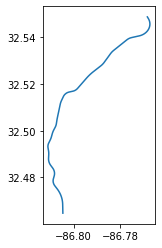

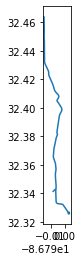

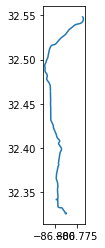

In [32]:
N_roads=shapefile.loc[shapefile['FULLNAME'] == 'Co Rd 15 N']
S_roads=shapefile.loc[shapefile['FULLNAME'] == 'Co Rd 15 S']
print(N_roads)
print(S_roads)
N_roads.plot()
S_roads.plot()
result = N_roads.append(S_roads, ignore_index=True)
result.plot()
print(result)

In [37]:
result

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,110585079107,Co Rd 15 N,C,S1400,"LINESTRING (-86.80463 32.46436, -86.80469 32.4..."
1,1105320995499,Co Rd 15 S,C,S1400,"LINESTRING (-86.78773 32.32680, -86.78775 32.3..."
2,110585079109,Co Rd 15 S,C,S1400,"LINESTRING (-86.78773 32.32680, -86.78729 32.3..."
3,1105320995500,Co Rd 15 S,C,S1400,"LINESTRING (-86.79621 32.34296, -86.79619 32.3..."
4,1105320990919,Co Rd 15 S,C,S1400,"LINESTRING (-86.79846 32.34084, -86.79830 32.3..."


In [35]:
shapefile.loc[shapefile['FULLNAME']=='State Rte 6']
#=shapefile.loc[shapefile['FULLNAME'] == 'Co Rd 15 S']

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
298,110585079050,State Rte 6,S,S1200,"LINESTRING (-86.41158 32.44273, -86.41167 32.4..."
1222,110585079048,State Rte 6,S,S1200,"LINESTRING (-86.43073 32.43836, -86.43030 32.4..."
1505,110585079052,State Rte 6,S,S1200,"LINESTRING (-86.47544 32.43919, -86.47494 32.4..."
1510,110585079049,State Rte 6,S,S1200,"LINESTRING (-86.47134 32.43755, -86.47102 32.4..."
1807,110585079045,State Rte 6,S,S1200,"LINESTRING (-86.48690 32.44739, -86.48682 32.4..."
2102,110585079046,State Rte 6,S,S1200,"LINESTRING (-86.50395 32.46881, -86.50349 32.4..."
2282,110585079053,State Rte 6,S,S1200,"LINESTRING (-86.50395 32.46881, -86.50427 32.4..."
2432,110585079047,State Rte 6,S,S1200,"LINESTRING (-86.50395 32.46881, -86.50353 32.4..."
2449,110585079051,State Rte 6,S,S1200,"LINESTRING (-86.47544 32.43919, -86.47508 32.4..."


In [36]:
shapefile.to_csv('original_shaplefile.csv', index = True)

In [87]:
type(shapefile)

geopandas.geodataframe.GeoDataFrame

In [12]:
print(shapefile.loc[[0],'geometry'])

0    LINESTRING (-86.68571 32.60424, -86.68572 32.6...
Name: geometry, dtype: geometry


In [10]:
print(shapefile.MTFCC.value_counts())
print(shapefile.RTTYP.value_counts())

S1400    2553
S1200      67
S1630      24
S1750       9
S1500       5
S1640       3
S1100       2
S1780       1
S1730       1
S1710       1
Name: MTFCC, dtype: int64
M    1795
C     294
S      26
O      14
U      12
I       2
Name: RTTYP, dtype: int64


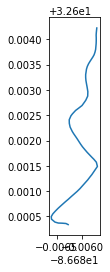

In [8]:
shapefile.loc[[0],'geometry'].plot()

In [91]:
sum(shapefile.geometry.length)

29.481480687949407

In [15]:
print(type(shapefile.geometry))
print(shapefile.loc[[0],'geometry'])
print(shapefile.loc[[0],'geometry'].geometry.length)

<class 'geopandas.geoseries.GeoSeries'>
0    LINESTRING (-86.68571 32.60424, -86.68572 32.6...
Name: geometry, dtype: geometry
0    0.004894
dtype: float64


In [92]:
print(sum(shapefile[shapefile.MTFCC == 'S1100'].geometry.length))
print(sum(shapefile[shapefile.MTFCC == 'S1200'].geometry.length))
print(sum(shapefile[shapefile.MTFCC == 'S1400'].geometry.length))

0.4931948681252485
3.051733346792688
25.80323389622992
